In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [37]:
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

In [10]:
y = [1, 2, 3, 4, 5]

In [35]:
x2 = [2, 4, 6]
y2 = [8, 64, 216]

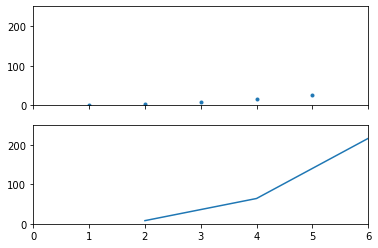

In [49]:
fig, ax = plt.subplots(nrows = 2, sharex = True, sharey = True)
plt.xlim((0, 6))
plt.ylim((0, 250))
ax[0].plot(x, y, '.')
ax[1].plot(x2, y2)
plt.show()

In [19]:
col_names = ["chr", "start", "end"]

In [23]:
df_K4 = pd.read_table("../../qbb2020/data/K4me3.bed", names = col_names)
df_K4

,chr,start,end
0,3L,15823270,15830715
1,2R,11451787,11459612
2,3R,21665759,21673392
3,2R,20324929,20331038
4,3R,19859679,19864278
...,...,...,...
3825,3R,565835,566082
3826,2L,10439373,10442085
3827,3R,4477321,4479529
3828,3L,711347,711871


In [64]:
chr_K4 = df_K4.loc[:,"chr"]
chr_K4 = chr_K4.value_counts()
chr_K4

3R                     897
2R                     799
3L                     773
2L                     713
X                      580
4                       65
Y                        2
Y_CP007111v1_random      1
Name: chr, dtype: int64

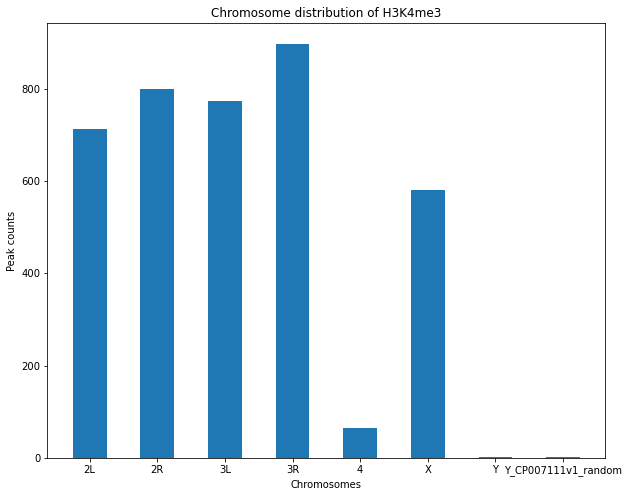

In [178]:
fig, ax = plt.subplots(figsize = (10.0, 8.0))
ax.bar(sorted(chr_K4.index), chr_K4[sorted(chr_K4.index)], width = 0.5)
ax.set_title("Chromosome distribution of H3K4me3")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Peak counts")
plt.show()

In [81]:
def width_and_distr(filename):
    path = "../../qbb2020/data/" + filename
    col_names = ["chr", "start", "end"]
    df = pd.read_table(path, names = col_names)
    df.loc[:, "width"] = df.loc[:, "end"] - df.loc[:, "start"]
    chr_distr = df.loc[:,"chr"]
    chr_distr = chr_distr.value_counts()
    return (df, chr_distr)

In [84]:
df_k4, chr_k4 = width_and_distr("K4me3.bed")
df_k9, chr_k9 = width_and_distr("K9me3.bed")
df_k27, chr_k27 = width_and_distr("K27me3.bed")

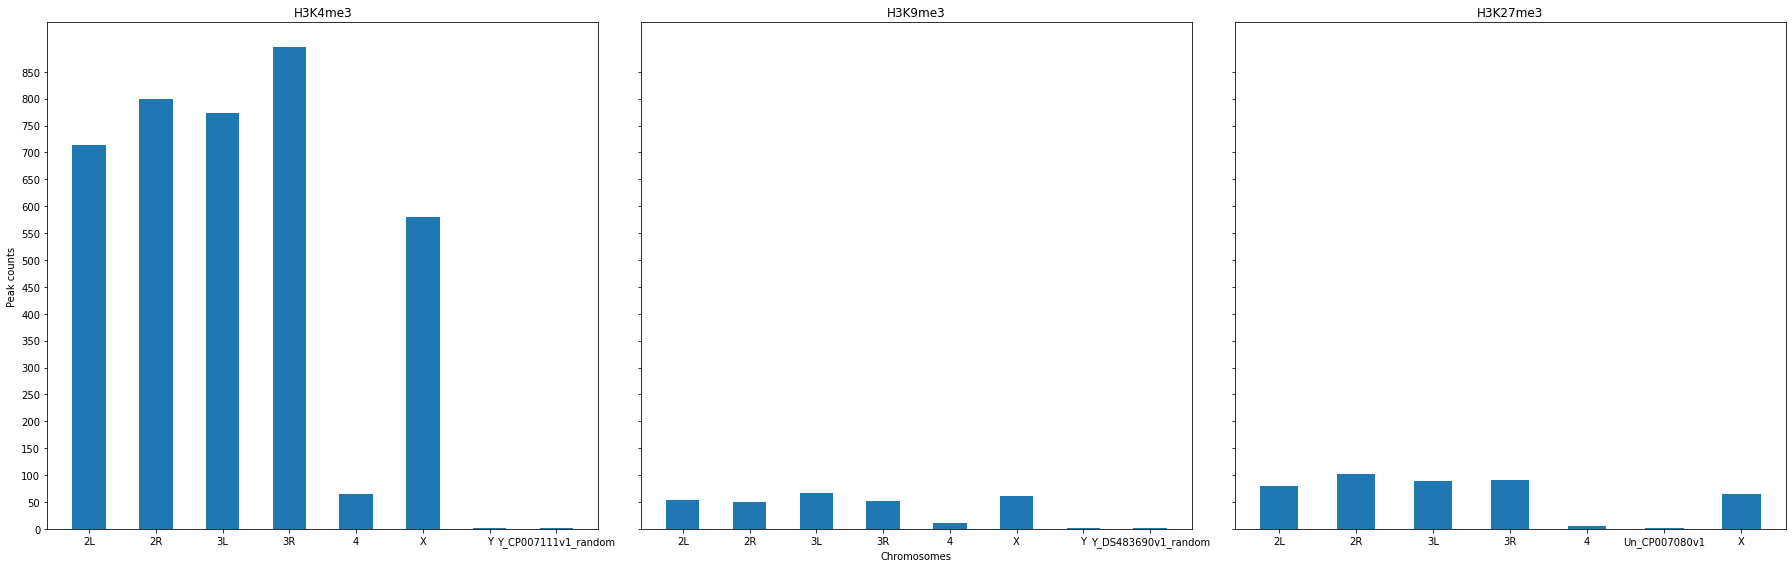

In [123]:
fig, ax = plt.subplots(ncols = 3, figsize = (25.0, 8.0), sharey = True)
ax[0].bar(sorted(chr_k4.index), chr_k4[sorted(chr_k4.index)], width = 0.5)
ax[0].set_title("H3K4me3")
ax[1].bar(sorted(chr_k9.index), chr_k9[sorted(chr_k9.index)], width = 0.5)
ax[1].set_title("H3K9me3")
ax[2].bar(sorted(chr_k27.index), chr_k27[sorted(chr_k27.index)], width = 0.5)
ax[2].set_title("H3K27me3")
ax[1].set_xlabel("Chromosomes")
ax[0].set_ylabel("Peak counts")
ax[0].set_yticks(range(0, 900, 50))
plt.tight_layout()
plt.show()

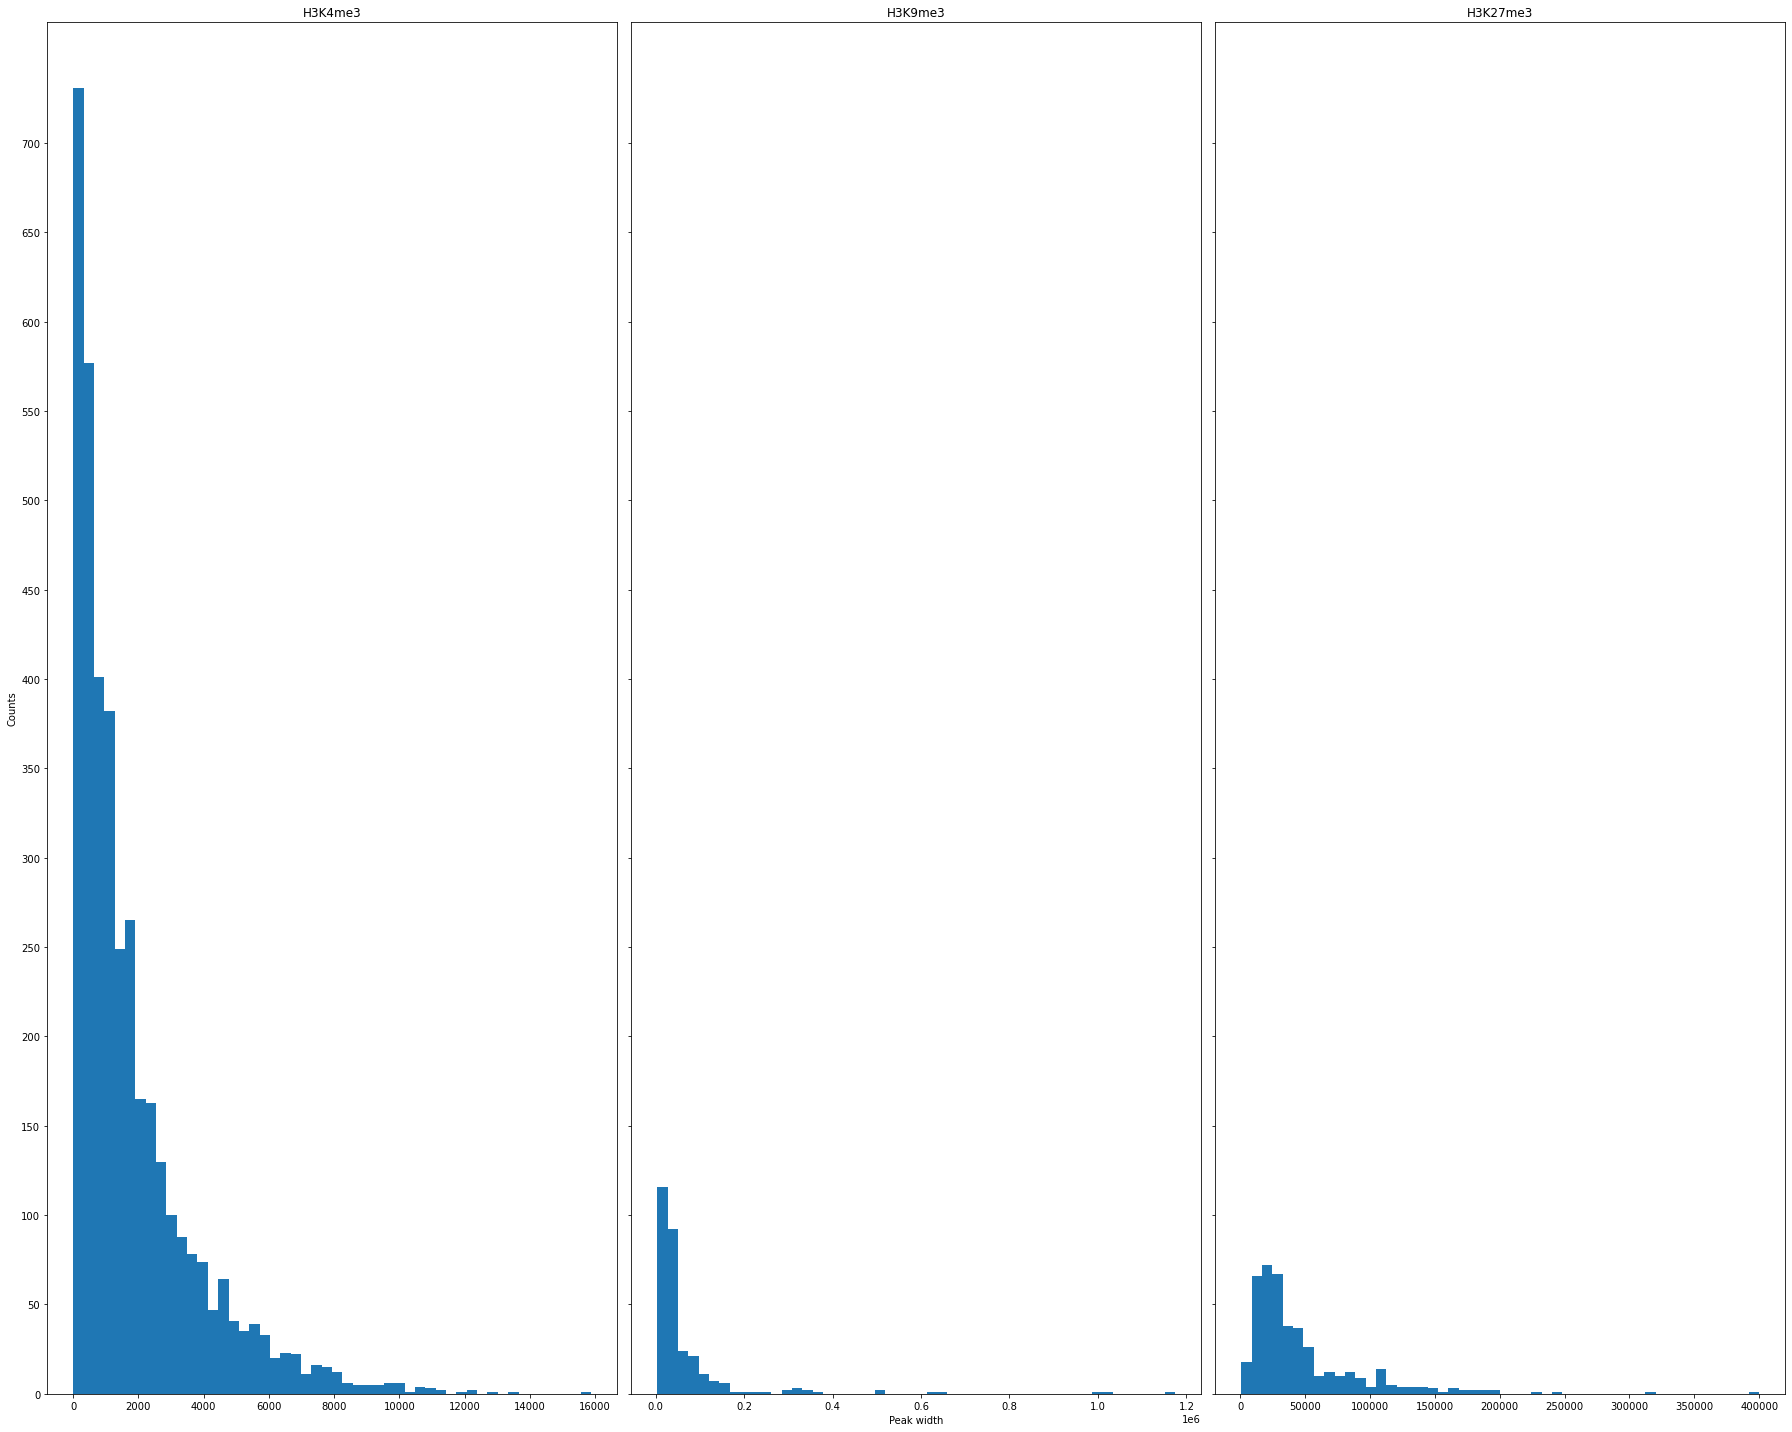

In [179]:
fig, ax = plt.subplots(ncols = 3, figsize = (25.0, 20.0), sharey = True)
ax[0].hist(df_k4.loc[:,"width"], bins = 50)
ax[0].set_title("H3K4me3")
ax[0].set_yticks(range(0, 750, 50))
ax[1].hist(df_k9.loc[:,"width"], bins = 50)
ax[1].set_title("H3K9me3")
ax[2].hist(df_k27.loc[:,"width"], bins = 50)
ax[2].set_title("H3K27me3")
ax[0].set_ylabel("Counts")
ax[1].set_xlabel("Peak width")
plt.tight_layout()
plt.show()

In [138]:
df_fpkms = pd.read_csv( "../../qbb2020/data/fpkms.csv", index_col="t_name" )
df_fpkms

,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
t_name,,,,,,,,,,,,,,,,,
FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591


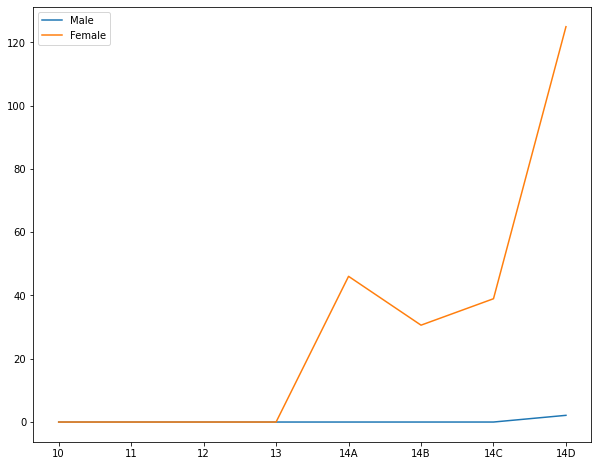

In [171]:
goi = "FBtr0331261"
df_sxl = df_fpkms.loc[goi,:]
male = df_sxl[1:9]
female = df_sxl[9:]

stages = ["10", "11", "12", "13", "14A", "14B", "14C", "14D"]
male.index = stages
female.index = stages

fig, ax = plt.subplots(figsize = (10.0, 8.0))
ax.plot(male.index, male, label = 'Male')
ax.plot(female.index, female, label = 'Female')
plt.legend()
plt.show()

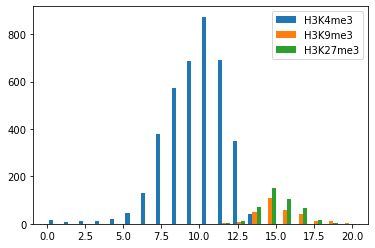

In [219]:
all_distr = np.array([df_k4.loc[:,"width"].values, df_k9.loc[:,"width"].values, df_k27.loc[:,"width"].values], dtype = object)
log_all_distr = [np.log2(each) for each in all_distr]
fig, ax = plt.subplots()
ax.hist(log_all_distr, 20, label = ["H3K4me3", "H3K9me3", "H3K27me3"])
plt.legend()
plt.show()

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


array([0       7445
1       7825
2       7633
3       6109
4       4599
        ... 
3825     247
3826    2712
3827    2208
3828     524
3829    2382
Name: width, Length: 3830, dtype: int64,
       0         8100
1        26264
2        27264
3        20600
4        20864
        ...   
291      11800
292      17564
293      28464
294      48164
295    1004678
Name: width, Length: 296, dtype: int64,
       0        4600
1        4064
2       32964
3       48400
4       28064
        ...  
426     77864
427    224464
428     11064
429     28964
430     32836
Name: width, Length: 431, dtype: int64], dtype=object)

0       7445
1       7825
2       7633
3       6109
4       4599
        ... 
3825     247
3826    2712
3827    2208
3828     524
3829    2382
Name: width, Length: 3830, dtype: int64

pandas.core.series.Series

RangeIndex(start=0, stop=3830, step=1)

array([7445, 7825, 7633, ..., 2208,  524, 2382])

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

/Users/zelinwei/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
No handles with labels found to put in legend.


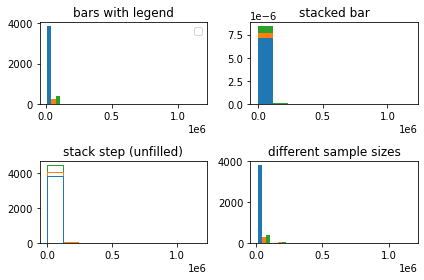

In [207]:
import numpy as np
import matplotlib.pyplot as plt


n_bins = 10
x = np.array([df_k4.loc[:,"width"].values, df_k9.loc[:,"width"].values, df_k27.loc[:,"width"].values])

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)

ax0.hist(x)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')


ax3.hist(x, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

In [211]:
x

array([array([7445, 7825, 7633, ..., 2208,  524, 2382]),
       array([   8100,   26264,   27264,   20600,   20864,   22364,   27564,
         25900,   86364,   25964,   41764,    4364,   25200,  146264,
         27036,   30200,   16464,   36864,   33264,   15464,   84564,
         33964,   58964,   45264,   15764,   98200,   27400,   16800,
         10664,   41764,   34364,   91164,   30500,   30964,   10864,
         91264,   79364,   26364,   40664,   32564,   12364,   21064,
         63364,   35264,   92164,   78100,  122264,  518632,   14764,
        179131,   32064,   80564,   36765,  308764, 1174364,   36464,
         18764,   92164,   91464,   43664,   30564,   35764,   16064,
         19864,   20464,   36964,   15264,    6400,   16664,  103364,
         16964,   25464,   30464,   93164,   18264,   38764,   48764,
         22764,   15464,   18164,   38564,  104300,    3964,   42364,
         34764,   33500,   29764,   28364,   54164,  100564,   30764,
        247791,   20464,  

In [213]:
np.log2(x[1])

array([12.98370619, 14.68079903, 14.73470962, 14.33035672, 14.34872815,
       14.44889063, 14.75049764, 14.66066448, 16.39814244, 14.66422504,
       15.34997227, 12.09143539, 14.62113611, 17.1582152 , 14.7225941 ,
       14.88226093, 14.00702727, 15.169925  , 15.02167404, 13.91662592,
       16.367756  , 15.05171876, 15.84754678, 15.46607646, 13.94434603,
       16.5834354 , 14.74188827, 14.03617361, 13.38046107, 15.34997227,
       15.06861036, 16.47617661, 14.89652162, 14.91830423, 13.40726776,
       16.47775827, 16.27619712, 14.68628166, 15.31146452, 14.9909903 ,
       13.59385794, 14.36249181, 15.95137579, 15.10590851, 16.49191571,
       16.25303493, 16.89964015, 18.9843517 , 13.84979602, 17.4506555 ,
       14.96866679, 16.29784769, 15.16604536, 18.23614503, 20.16344822,
       15.15418521, 14.19567979, 16.49191571, 16.48091639, 15.41415668,
       14.89954574, 15.12622048, 13.97154355, 14.27786855, 14.32080055,
       15.17383326, 13.89784546, 12.64385619, 14.02444712, 16.65